<a href="https://colab.research.google.com/github/B10856033/B10856033.github.io/blob/master/%E5%A4%A7%E6%95%B8%E6%93%9AIMDB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2022-05-16 15:03:47--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  35.6MB/s    in 2.3s    

2022-05-16 15:03:49 (35.6 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]



In [2]:
!tar -zxf aclImdb_v1.tar.gz

In [3]:
import re
from os import listdir
from keras.preprocessing import sequence
from keras_preprocessing.text import Tokenizer

#Imdb資料所在目錄
path = "aclImdb/"
#建立檔案清單
fList = [path + "train/pos/" + x for x in listdir(path + "train/pos")] + \
       [path + "train/neg/" + x for x in listdir(path + "train/neg")] + \
       [path + "test/pos/" + x for x in listdir(path + "test/pos")] + \
       [path + "test/neg/" + x for x in listdir(path + "test/neg")]

#刪除HTML標籤符號
def remove_tags(text):
  TAG = re.compile(r'<[^>]+>')
  return TAG.sub('',text)
#讀取文字檔案資料
input_label = ([1] * 12500 + [0] * 12500) * 2
input_text = []
#讀取檔案內容
for fname in fList:
  with open(fname, encoding="utf8") as ff:
    input_text += [remove_tags(" ".join(ff.readlines()))]
print(input_text[5])
print(input_label[5])
#將文字分割成單字， 建立詞索引字典
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(input_text[:25000])
print("文件數: ", tok.document_count)
print({k: tok.word_index[k] for k in list(tok.word_index)[:10]})
#建立訓練及測試資料集
X_train = tok.texts_to_sequences(input_text[:25000])
X_test = tok.texts_to_sequences(input_text[25000:])
Y_train = input_label[:25000]
Y_test = input_label[25000:]
#將序列資料填充成相同長度
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
print("X_train.shape: ",X_train.shape)
print("X_test.shape: ",X_test.shape)

This movie is awesome on so many levels... and none of them are the level that it was intended to be awesome on.Just remember this: When you're watching Shaun of the Dead and other recent zombie movies... be they good or bad... THIS is the formula that they are using. THIS is what makes zombie movies so great.And what makes it BETTER than great is the story behind the movie. A simple web search will provide you with everything you need to know.All in all, it doesn't linger. There's never a point where you think to yourself "c'mon, get on with it"... it moves quick and corners nicely. This is the sporty, little Italian number of zombie flicks.So awful, it's wonderful! If your tongue spends an ample amount of time in your cheek... rent it, buy it, love it.As a great trivia note: If you're watching it on DVD, you'll notice that there is sound effects during the menu screen, underneath the musical score... Well... that's because that music was lifted straight from the trailer... which is p

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           64000     
                                                                 
 dropout_3 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               819456    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 46)                11822     
                                                                 
Total params: 895,278
Trainable params: 895,278
Non-tr

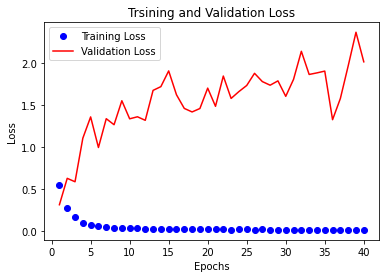

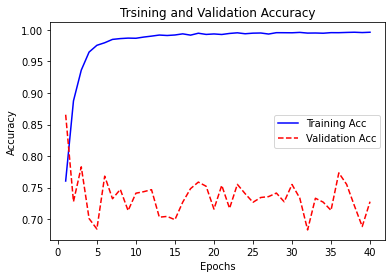

In [9]:
import numpy as np
from keras.datasets import imdb
from keras_preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM 
from tensorflow.keras.utils import to_categorical

#定義模型
model = Sequential()
model.add(Embedding(2000, 32, input_length=100))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(46, activation="sigmoid"))
model.summary()  #顯示模型摘要資訊

#編譯模型
model.compile(loss="categorical_crossentropy",optimizer="adam",
              metrics=["accuracy"])
#訓練模型
history = model.fit(X_train,Y_train,validation_split=0.2,epochs=40,batch_size=32,verbose=2)

#評估結果
loss,accuracy = model.evaluate(X_test,Y_test)
print("訓練資料集準確度 = {:.2f}".format(accuracy))

import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1,len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"r",label="Validation Loss")
plt.title("Trsining and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1,len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs,acc,"b-",label="Training Acc")
plt.plot(epochs,val_acc,"r--",label="Validation Acc")
plt.title("Trsining and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()